# Importing EPRpy

In [15]:
import eprpy as epr

# Data (1D)

## Loading data

In [16]:
tempo = epr.load('tempo.DSC')

In [17]:
type(tempo) # tempo is an EprData object

eprpy.loader.EprData

## Plotting

* Every `EprData` object has a plot method for making quick plots for inspection.

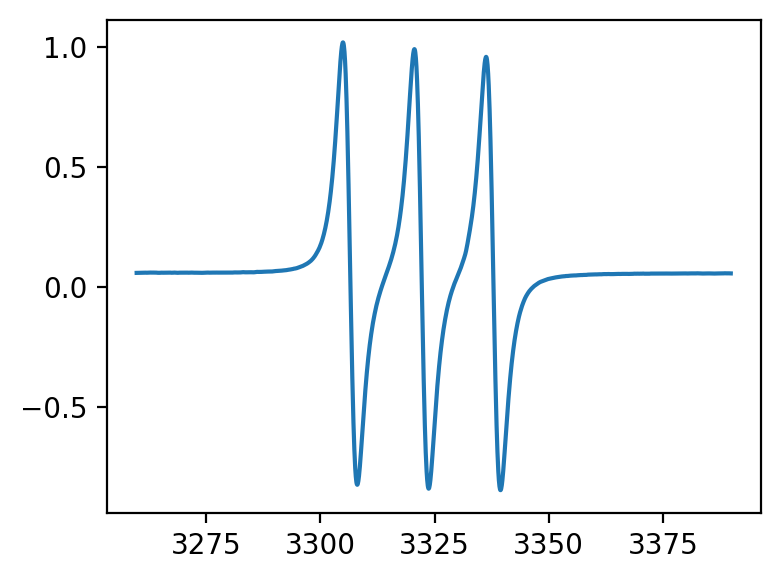

In [18]:
fig,ax = tempo.plot()


### Formatting plots

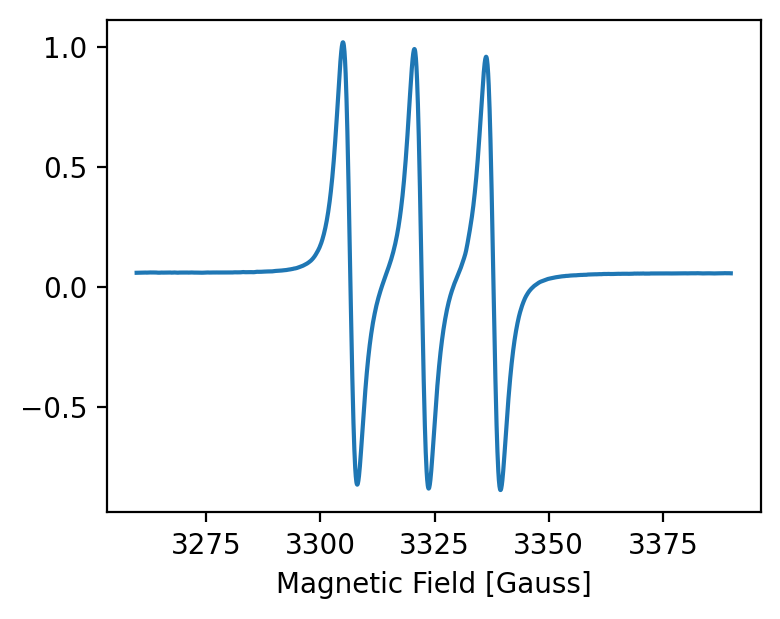

In [19]:
ax.set_xlabel('Magnetic Field [Gauss]') # set x axis label
fig

### Use attributes directly to plot

* Alternatively, plots can be made directly using matplotlib and ``EprData`` attributes with full control over formatting.

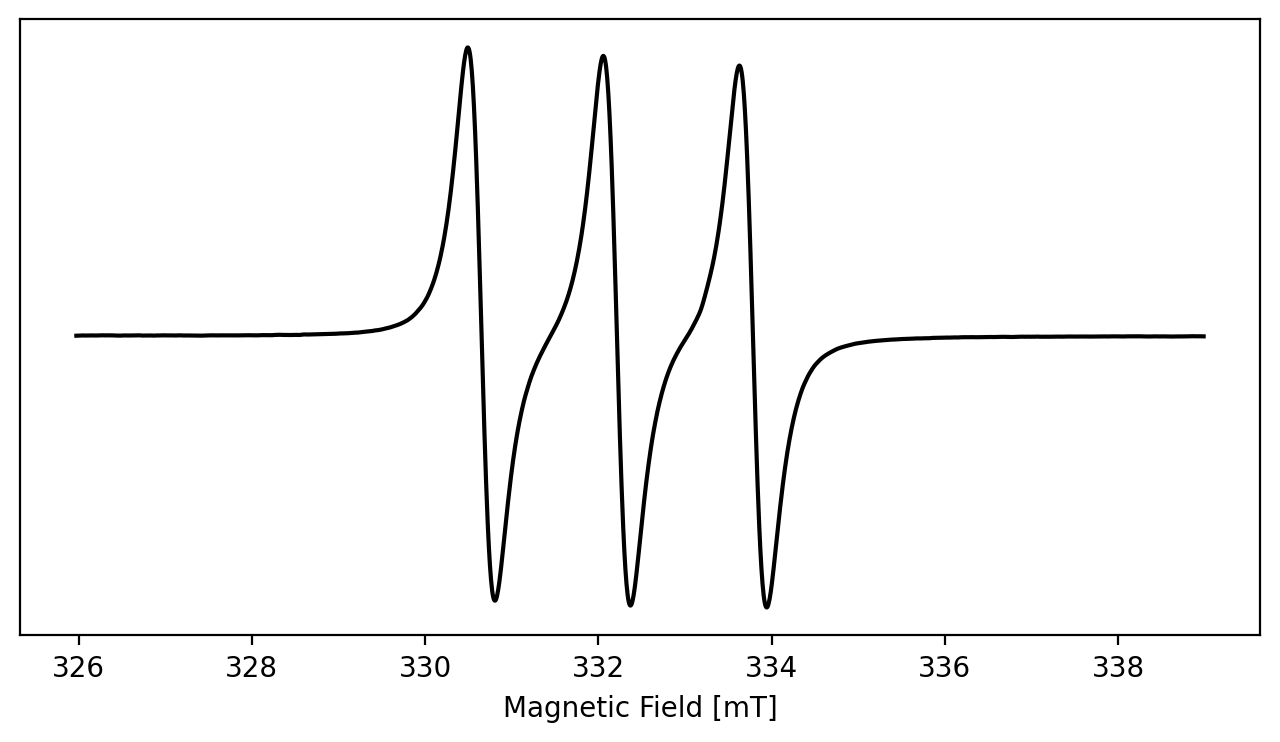

In [20]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(tempo.x/10,tempo.data,color='black') # convert Gauss to mT
ax.set_xlabel('Magnetic Field [mT]') # set x axis label
_=ax.set_yticks([]) # hide intensity


# Operations on Data

## Scaling data

After scaling : 


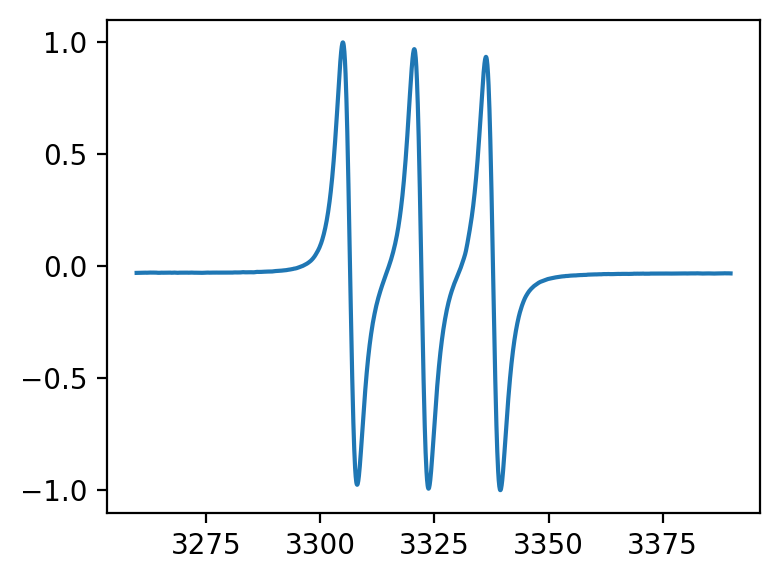

In [23]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# scale between -1 and 1
tempo.scale_between(-1,1)

print('After scaling : ')
fig,ax = tempo.plot()

## Baseline correction

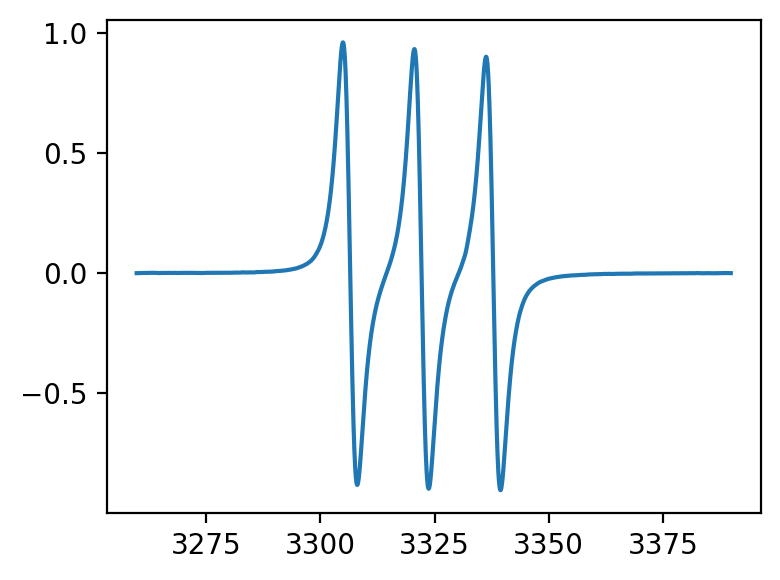

In [25]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# linear baseline correction
tempo.baseline_correct() # default is linear baseline correction using 10 points at the start and end of the data.
fig,ax = tempo.plot()

## Computing integrals

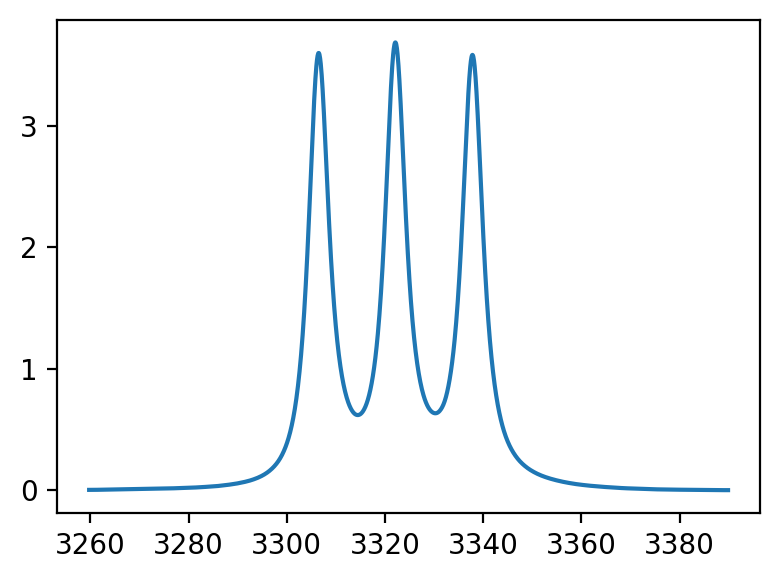

In [26]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# baseline correction and integration
tempo.baseline_correct()
tempo.integral()

# plot the absorption signal
fig,ax = tempo.plot()

## Selecting a region

* For this example, we assume that the desired region is  the low field hyperfine line.

Full spectrum : 


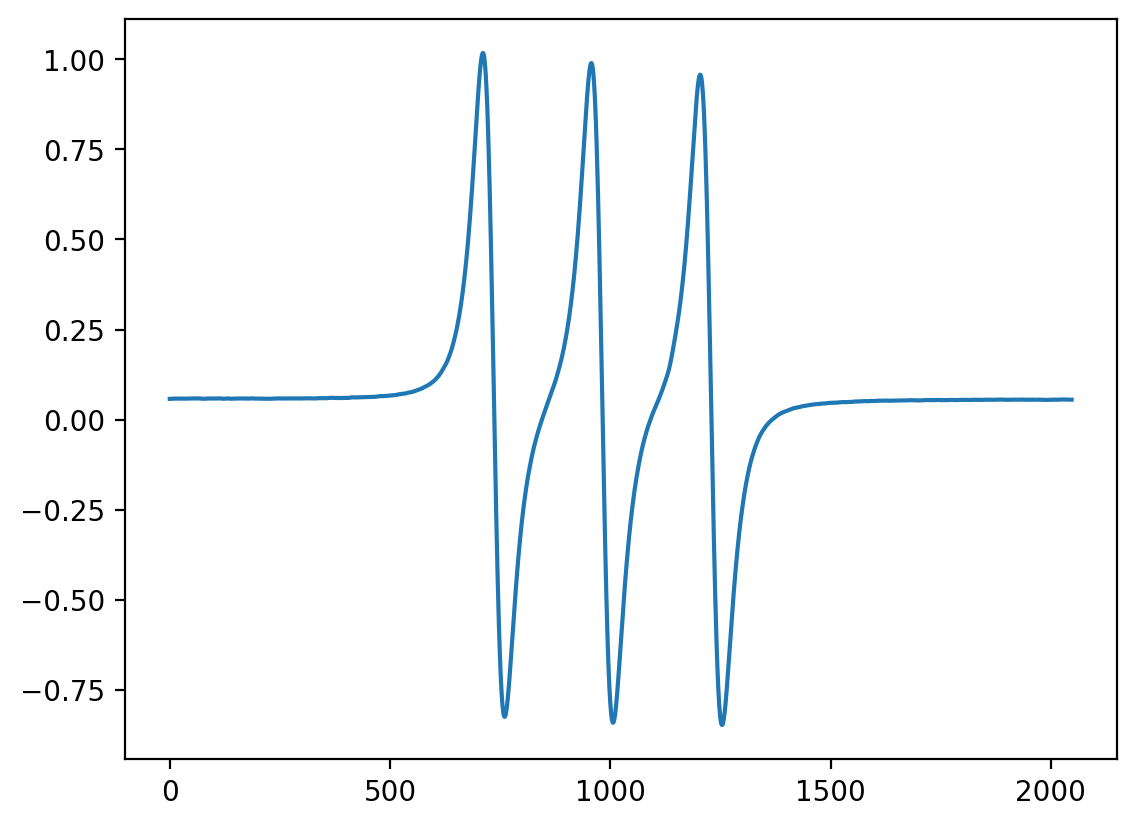

In [28]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# Plot the data using an array with unity spacing to find corresponding indices
import matplotlib.pyplot as plt
print('Full spectrum : ')
_=plt.plot(tempo.data)

# make a new EprData object corresponding to the desired region
tempo_region = tempo.select_region(range(550,850)) # indices from 0 to 900

Selected region : 


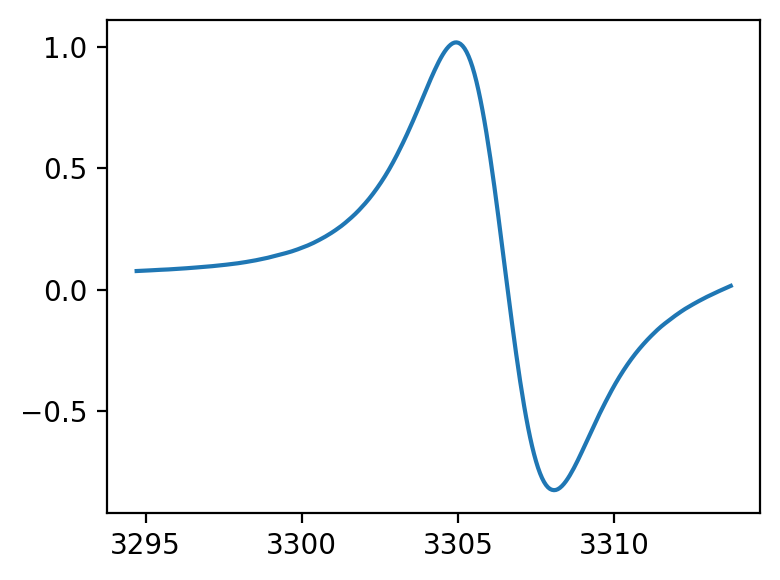

In [29]:
# selected region, note that the the new EprData object tempo_region only has the data corresponding to this region
print('Selected region : ')
fig,ax = tempo_region.plot()

## History of data operations

EPRpy allows for keeping a log of data operations done on an EprData object, as long as in-built functions are used.

In [30]:
# import EPRpy
import eprpy as epr

# load data
tempo = epr.load('tempo.DSC')

# do some operations
tempo.scale_between(-1,1)
tempo.baseline_correct()
tempo.integral()

### Access history

* Each ``EprData`` object stores history of all data operations and the corresponding ``EprData`` object in a list of lists. The first item in each list is the description of the data operation and the second item is the corresponding ``EprData`` object.

In [31]:
tempo.history

[['2025-01-14 11:15:48.500996 : Data loaded from tempo.DSC.',
 ['2025-01-14 11:15:48.503469 : Data scaled between -1 and 1.',
 ['2025-01-14 11:15:48.504666 : Baseline corrected',
 ['2025-01-14 11:15:48.506104 : Integral calculated',


* To plot or access a specific ``EprData`` from the history, simply use indexing. For instance, to view the original data again, plot the first item in history:

2025-01-14 11:15:48.500996 : Data loaded from tempo.DSC.


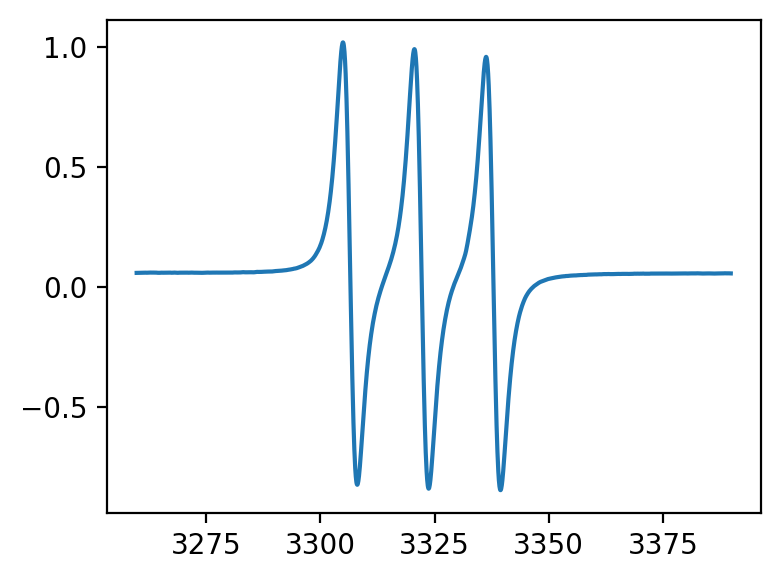

In [32]:
print(tempo.history[0][0])
fig,ax = tempo.history[0][1].plot() 

2025-01-14 11:15:48.504666 : Baseline corrected


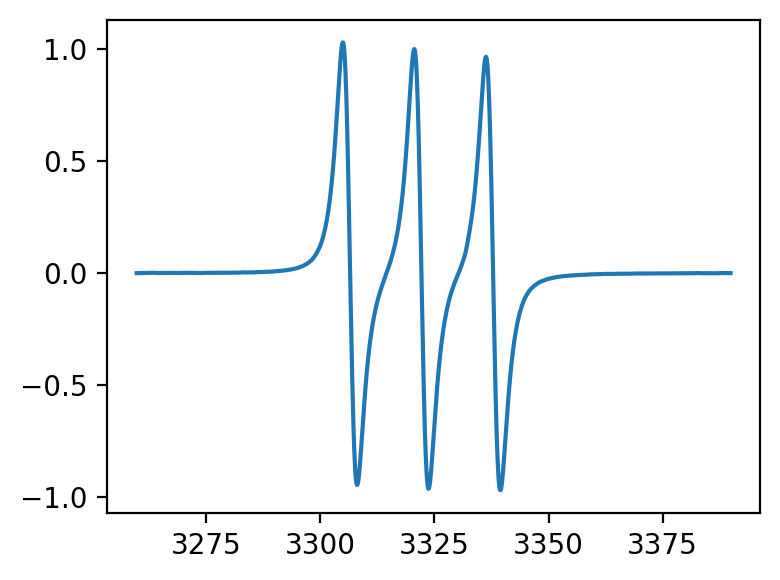

In [33]:
print(tempo.history[2][0])
fig,ax = tempo.history[2][1].plot() 